# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [36]:
dem = pd.read_csv("demo.csv")

In [37]:
dem.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [38]:
dem_encoded = pd.get_dummies(dem[["sexo", "posse_de_imovel"]])

In [39]:
x = dem_encoded
y = dem["mau"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [40]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

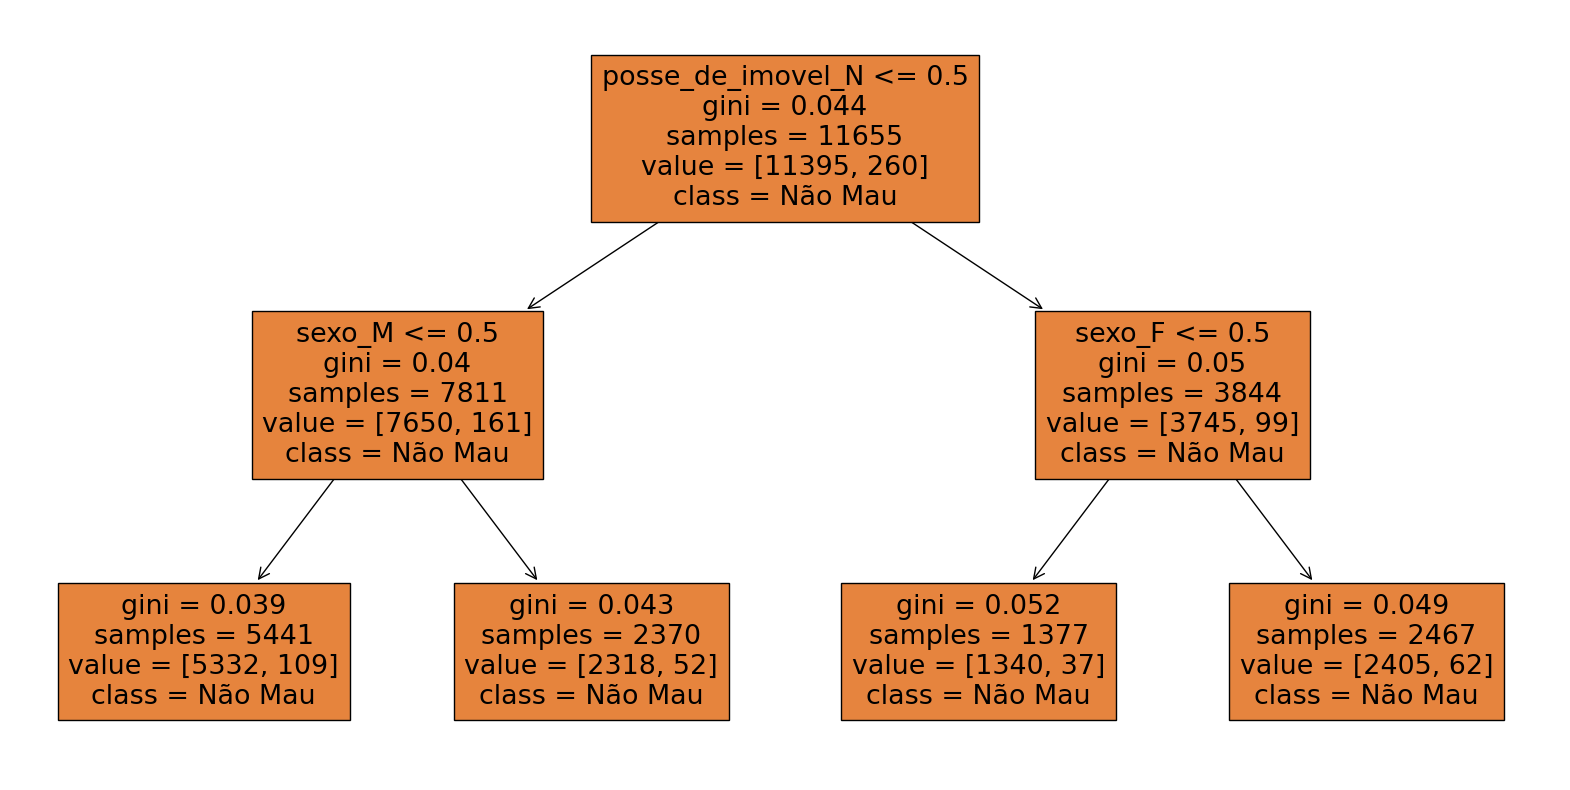

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=["Não Mau", "Mau"])
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scikitplot as skplt

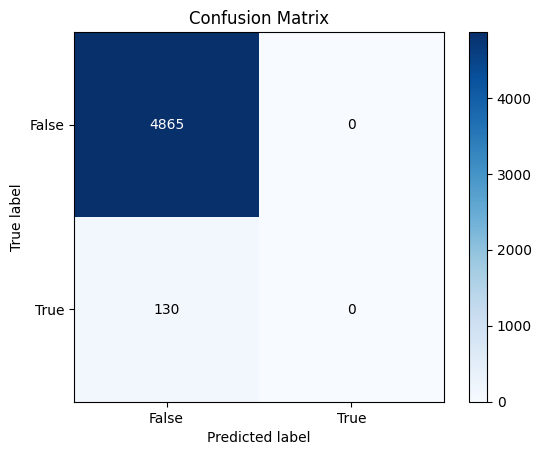

In [43]:
pred = clf.predict(x_val)
skplt.metrics.plot_confusion_matrix(y_val, pred)

plt.show()

In [44]:
from sklearn.metrics import accuracy_score
accur = accuracy_score(y_val, pred)
accur

0.973973973973974

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

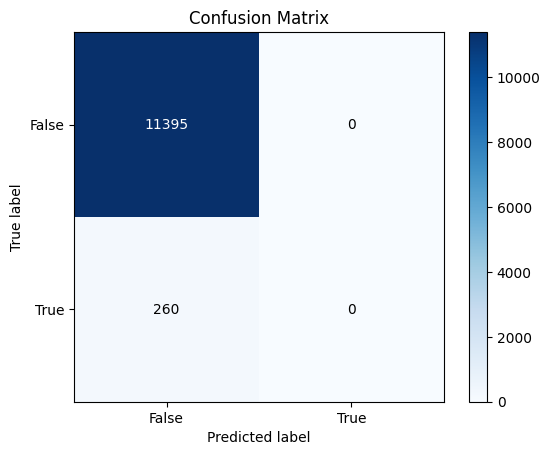

In [53]:
y_pred = clf.predict(x_train)

skplt.metrics.plot_confusion_matrix(y_train, y_pred)


In [57]:
clf = DecisionTreeClassifier(min_samples_leaf= 5, max_depth=10, random_state=123)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

0.9776919776919777

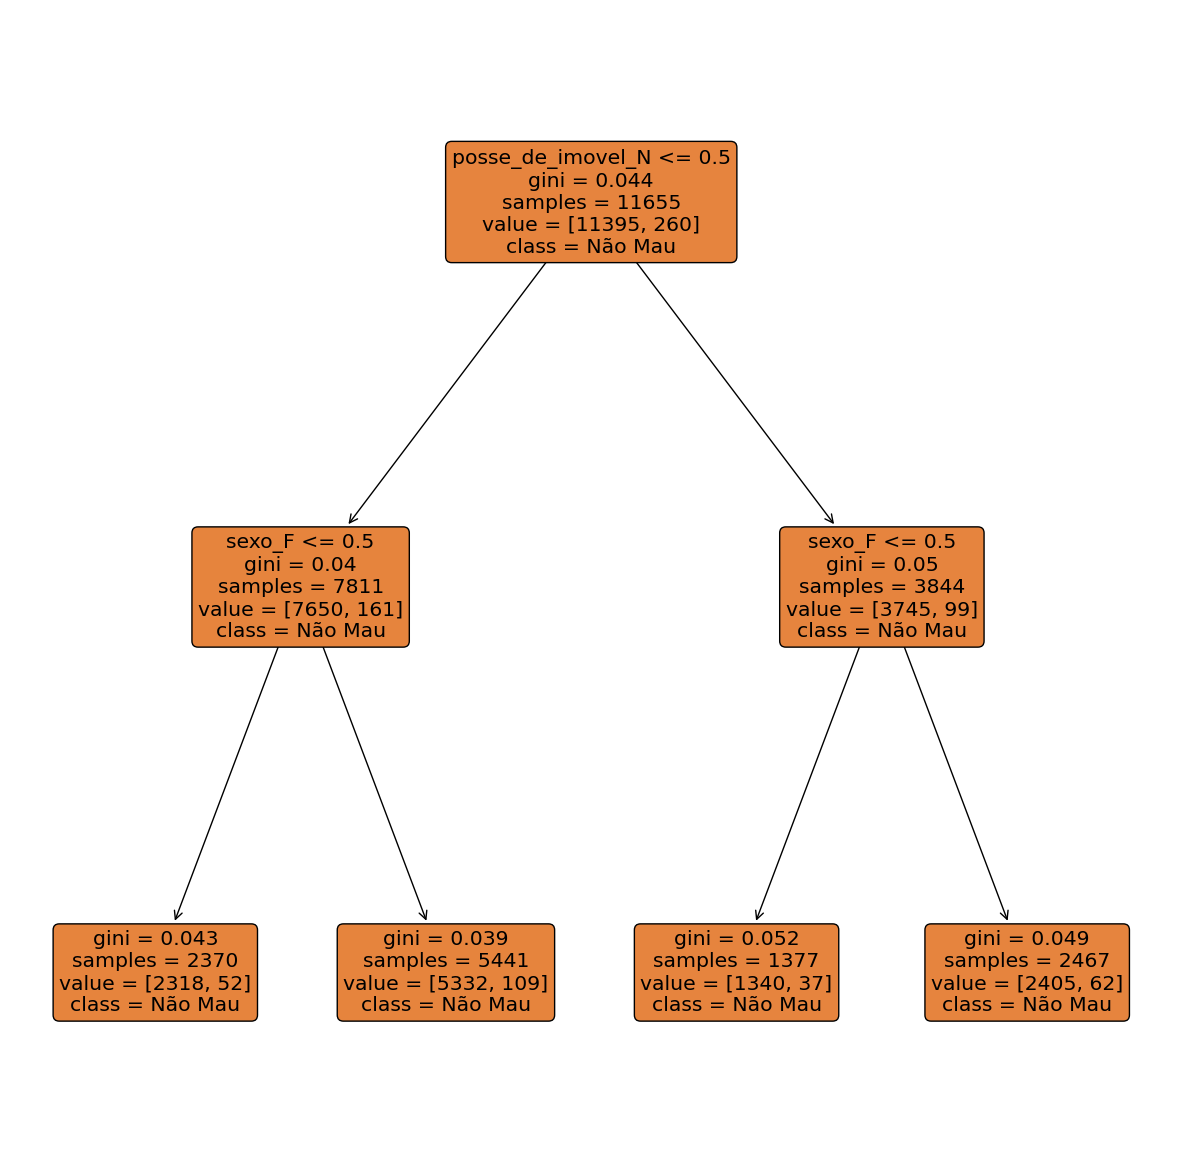

In [63]:
plt.figure(figsize= [15,15] )
plot_tree (clf,
           filled=True,
           rounded= True,
           class_names= ["Não Mau", "Mau"],
           feature_names= x_train.columns);